In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)



In [16]:
df=pd.read_excel("Telco_customer_churn.xlsx")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [18]:
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [10]:
df.shape

(7043, 33)

In [13]:
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [19]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,7043.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,7043,1129,Los Angeles,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,7043.0,NaN,NaN,NaN,93521.964646,1865.794555,90001.0,92102.0,93552.0,95351.0,96161.0
Lat Long,7043,1652,"34.159534, -116.425984",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7043.0,NaN,NaN,NaN,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,NaN,NaN,NaN,-119.79888,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [21]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns


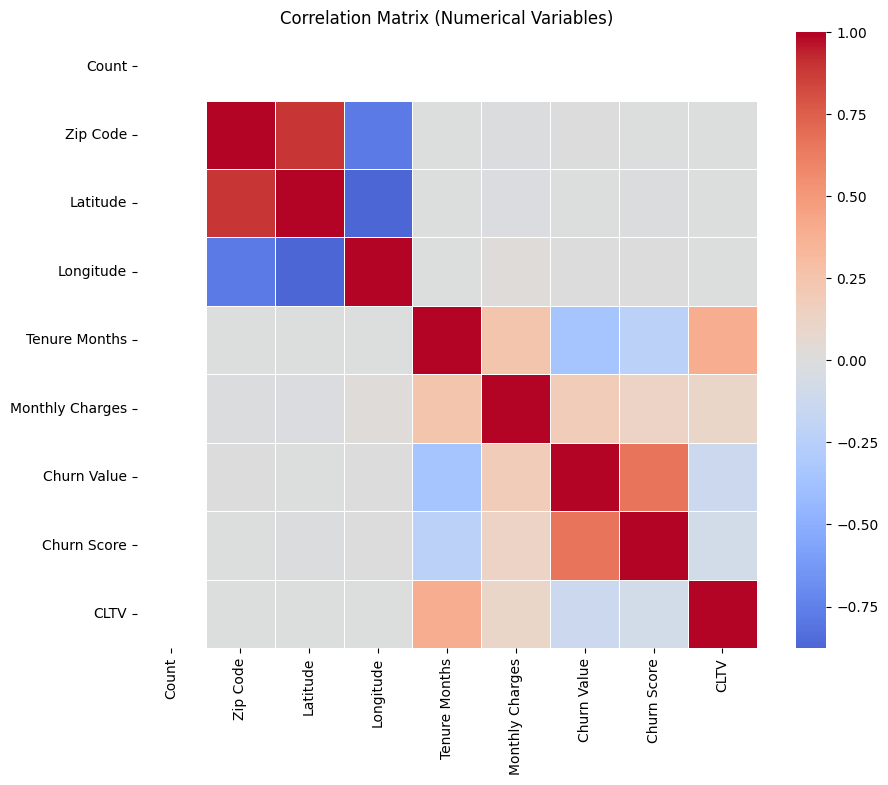

In [22]:
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot=False
)
plt.title("Correlation Matrix (Numerical Variables)")
plt.show()


In [23]:
cat_cols = df.select_dtypes(include=["object"]).columns


In [24]:
for col in cat_cols:
    churn_rate = df.groupby(col)["Churn Label"].mean().sort_values(ascending=False)
    
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn rate")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


TypeError: agg function failed [how->mean,dtype->object]

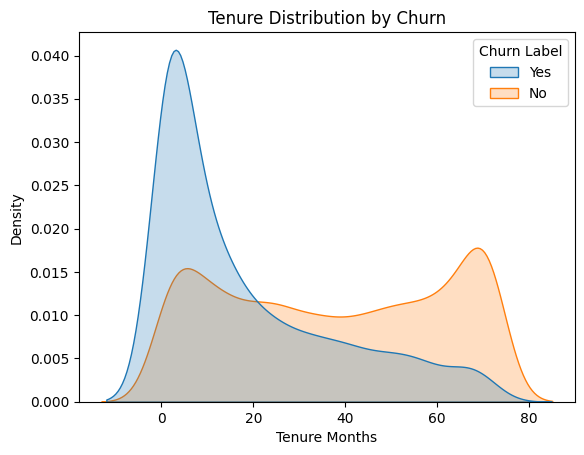

In [25]:
sns.kdeplot(
    data=df,
    x="Tenure Months",
    hue="Churn Label",
    fill=True,
    common_norm=False
)
plt.title("Tenure Distribution by Churn")
plt.show()


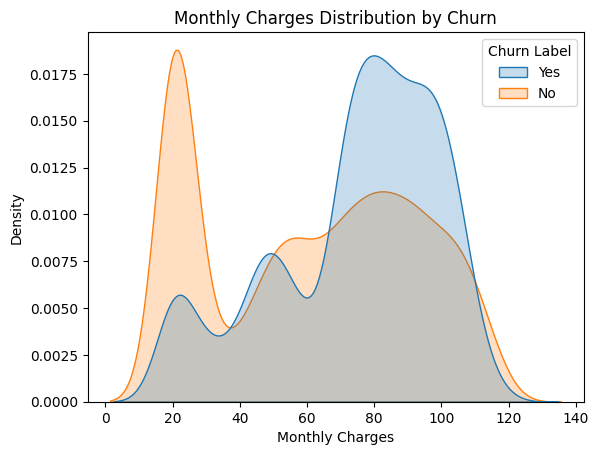

In [26]:
sns.kdeplot(
    data=df,
    x="Monthly Charges",
    hue="Churn Label",
    fill=True,
    common_norm=False
)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


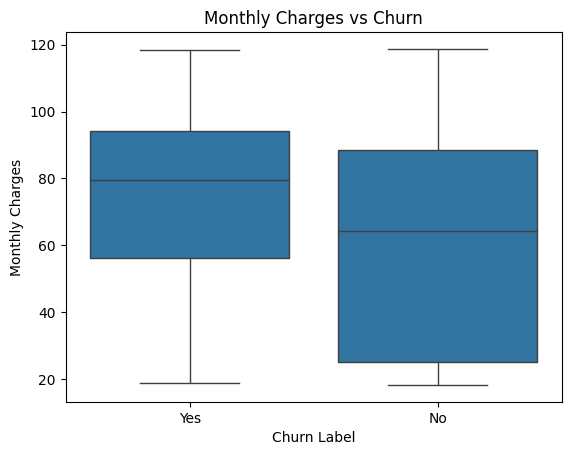

In [27]:
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


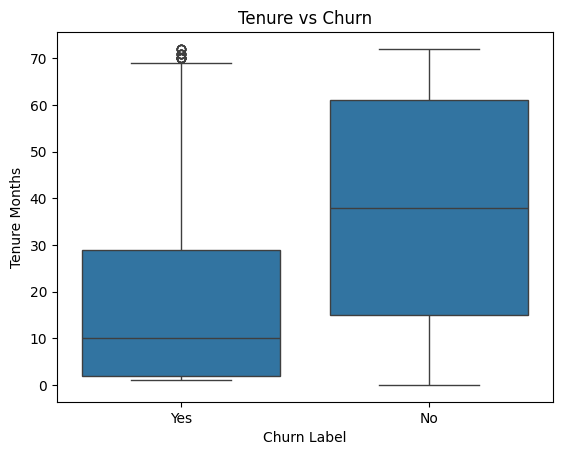

In [28]:
sns.boxplot(x="Churn Label", y="Tenure Months", data=df)
plt.title("Tenure vs Churn")
plt.show()


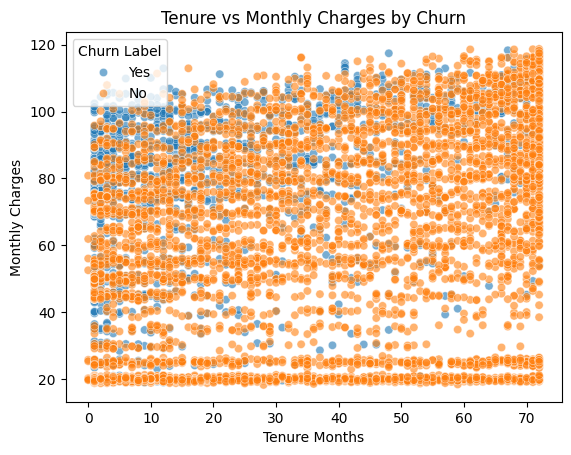

In [29]:
sns.scatterplot(
    data=df,
    x="Tenure Months",
    y="Monthly Charges",
    hue="Churn Label",
    alpha=0.6
)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()


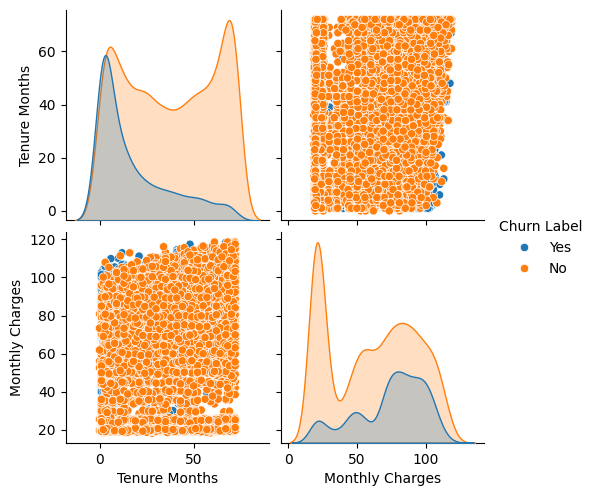

In [30]:
sns.pairplot(
    df[[
        "Tenure Months",
        "Monthly Charges",
        "Total Charges",
        "Churn Label"
    ]],
    hue="Churn Label"
)
plt.show()


In [31]:
df["tenure_group"] = pd.cut(
    df["Tenure Months"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1y", "1-2y", "2-4y", "4-6y"]
)

df.groupby("tenure_group")["Churn Label"].mean().plot(kind="bar")
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn rate")
plt.show()


C:\Users\Gianmario\AppData\Local\Temp\ipykernel_15244\359854180.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn Label"].mean().plot(kind="bar")


TypeError: agg function failed [how->mean,dtype->object]

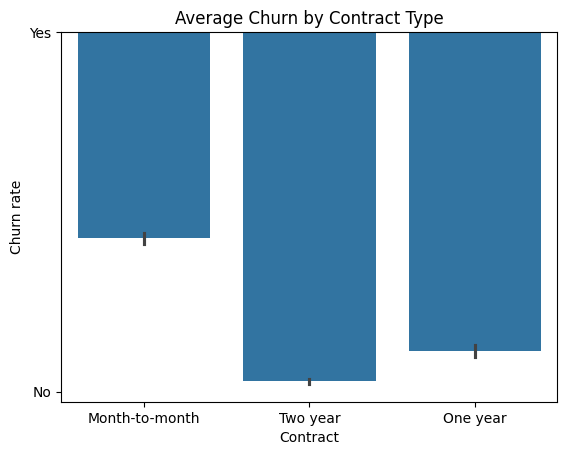

In [32]:
sns.barplot(
    x="Contract",
    y="Churn Label",
    data=df,
    estimator=np.mean
)
plt.title("Average Churn by Contract Type")
plt.ylabel("Churn rate")
plt.show()


In [33]:
#Rimuovo le colonne leakage
[col for col in df.columns if "Churn" in col]


['Churn Label', 'Churn Value', 'Churn Score', 'Churn Reason']

In [34]:
leakage_cols = [
    "CustomerID",      # identificativo
    "Churn Value",     # duplicato della label
    "Churn Reason",    # informazione ex-post
    "Churn Score",     # variabile derivata
    "CLTV"             # spesso calcolata usando churn
]


In [35]:
df_clean = df.drop(columns=leakage_cols, errors="ignore")


In [36]:
#Verifico
df_clean.columns


Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'tenure_group'],
      dtype='object')

In [37]:
[col for col in df_clean.columns if "Reason" in col or "Score" in col]


[]

In [ ]:
#Iniziamo con la pulizia 

#Trasformo in numerica
df_clean["Total Charges"] = pd.to_numeric(
    df_clean["Total Charges"],
    errors="coerce"
)


In [ ]:
df_clean.duplicated().sum()
#Non ho duplicati

np.int64(0)

In [41]:
#Feature engineering

df_clean["AvgCharges"] = (
    df_clean["Total Charges"] / df_clean["Tenure Months"]
)


In [42]:
X = df_clean.drop("Churn Label", axis=1)
y = df_clean["Churn Label"]


NaN in X_enc: 22
Churn rate: 0.2653698707936959
Shape X_enc: (7043, 2817)


c:\Users\Gianmario\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



ROC-AUC XGBoost: 0.8504

=== Classification Report (XGBoost, threshold=0.5) ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



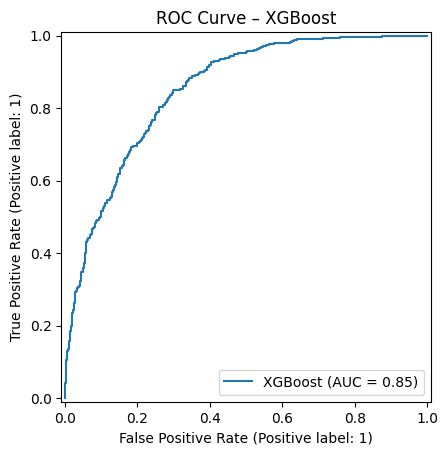

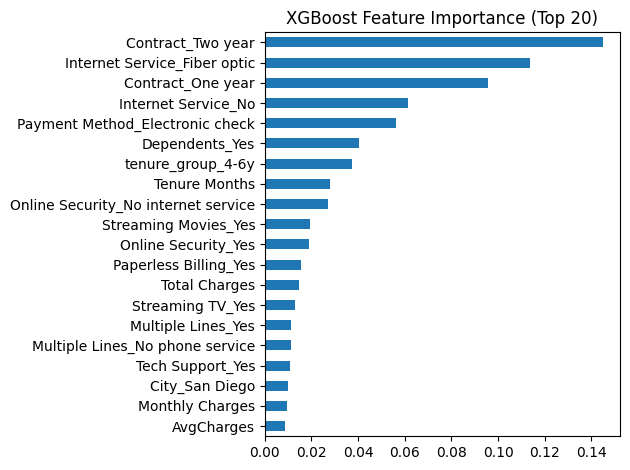

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report

# --- 0) Assicurati che y sia 0/1 ---
# Se y è già 0/1 non succede nulla, altrimenti prova a mappare.
if y.dtype == "object":
    y = y.map({"Yes": 1, "No": 0})

# --- 1) One-hot encoding (necessario) ---
X_enc = pd.get_dummies(X, drop_first=True)

# (opzionale) controllo rapido NaN
# XGBoost può gestirli, ma è utile sapere quanti sono
print("NaN in X_enc:", int(X_enc.isna().sum().sum()))
print("Churn rate:", float(y.mean()))
print("Shape X_enc:", X_enc.shape)

# --- 2) Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# --- 3) XGBoost (veloce con tree_method='hist') ---
try:
    from xgboost import XGBClassifier
except ImportError as e:
    raise ImportError("Installa xgboost: pip install xgboost") from e

xgb = XGBClassifier(
    n_estimators=250,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    eval_metric="logloss",
    random_state=42,
    use_label_encoder=False
)

xgb.fit(X_train, y_train)

# --- 4) Valutazione ---
proba_xgb = xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, proba_xgb)

print(f"\nROC-AUC XGBoost: {auc_xgb:.4f}\n")

pred_xgb = (proba_xgb >= 0.5).astype(int)
print("=== Classification Report (XGBoost, threshold=0.5) ===")
print(classification_report(y_test, pred_xgb))

# --- GRAFICO 1: ROC curve ---
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, proba_xgb, name="XGBoost", ax=ax)
ax.set_title("ROC Curve – XGBoost")
plt.show()

# --- GRAFICO 2: Feature importance (Top 20) ---
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
top20 = importances.sort_values(ascending=False).head(20).sort_values()

plt.figure()
top20.plot(kind="barh")
plt.title("XGBoost Feature Importance (Top 20)")
plt.tight_layout()
plt.show()


Numeriche: 8 Categoriche: 21 Totale: (7043, 29)
Silhouette scores: {2: 0.1961084891784401, 3: 0.1767949681317784, 4: 0.1652018242836879, 5: 0.15476673845863534, 6: 0.13914401662275158}
Best k: 2


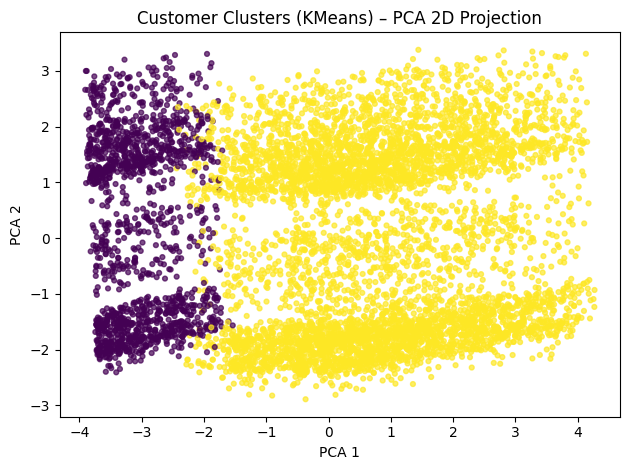


=== Cluster profile (numerical means) ===


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,AvgCharges
cluster,,,,,,,,
0,1.0,93560.701180,36.388908,-119.932553,30.547182,21.079194,665.220329,21.129634
1,1.0,93511.250136,36.252993,-119.761906,32.875657,76.844254,2729.505406,76.841891



=== Top categories per cluster (mode) ===

Country
cluster
0    United States
1    United States
Name: Country, dtype: object

State
cluster
0    California
1    California
Name: State, dtype: object

City
cluster
0    Los Angeles
1    Los Angeles
Name: City, dtype: object

Lat Long
cluster
0     33.28156, -115.955541
1    32.555828, -117.040073
Name: Lat Long, dtype: object

Gender
cluster
0    Male
1    Male
Name: Gender, dtype: object

Senior Citizen
cluster
0    No
1    No
Name: Senior Citizen, dtype: object

Partner
cluster
0    No
1    No
Name: Partner, dtype: object

Dependents
cluster
0    No
1    No
Name: Dependents, dtype: object

Phone Service
cluster
0    Yes
1    Yes
Name: Phone Service, dtype: object

Multiple Lines
cluster
0     No
1    Yes
Name: Multiple Lines, dtype: object

Internet Service
cluster
0             No
1    Fiber optic
Name: Internet Service, dtype: object

Online Security
cluster
0    No internet service
1                     No
Name: Online Security, d

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# =========================
# 0) FEATURES ONLY (no target)
# =========================
X_unsup = df_clean.drop(columns=["Churn Label"], errors="ignore").copy()

# (Consigliato) rimuovi anche eventuali altre colonne churn-related rimaste
drop_extra = [c for c in X_unsup.columns if "Churn" in c]
X_unsup = X_unsup.drop(columns=drop_extra, errors="ignore")

# =========================
# 1) Selezione colonne numeriche/categoriche
# =========================
num_cols = X_unsup.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_unsup.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeriche:", len(num_cols), "Categoriche:", len(cat_cols), "Totale:", X_unsup.shape)

# =========================
# 2) Preprocessing (impute + scale + one-hot)
# =========================
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# =========================
# 3) KMeans + scelta K veloce (silhouette su pochi K)
# =========================
# Trasforma una volta sola (veloce) e prova diversi K
X_mat = preprocess.fit_transform(X_unsup)

ks = [2, 3, 4, 5, 6]
sil_scores = {}

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_mat)
    sil = silhouette_score(X_mat, labels)
    sil_scores[k] = sil

best_k = max(sil_scores, key=sil_scores.get)
print("Silhouette scores:", sil_scores)
print("Best k:", best_k)

# Fit finale con best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_mat)

# Aggiungi cluster al dataframe originale per analisi
df_clusters = X_unsup.copy()
df_clusters["cluster"] = clusters

# =========================
# 4) Grafico 2D (PCA) dei cluster
# =========================
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_mat)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, s=12, alpha=0.7)
plt.title("Customer Clusters (KMeans) – PCA 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

# =========================
# 5) Profilazione cluster (numeriche)
# =========================
if len(num_cols) > 0:
    prof_num = df_clusters.groupby("cluster")[num_cols].mean()
    print("\n=== Cluster profile (numerical means) ===")
    display(prof_num)

# =========================
# 6) Profilazione cluster (categoriche) – top category per cluster
# =========================
print("\n=== Top categories per cluster (mode) ===")
for col in cat_cols:
    top = df_clusters.groupby("cluster")[col].agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)
    print(f"\n{col}")
    print(top)

# =========================
# 7) Dimensione cluster
# =========================
print("\n=== Cluster sizes ===")
print(df_clusters["cluster"].value_counts().sort_index())

# df_clusters contiene i clienti con il cluster assegnato


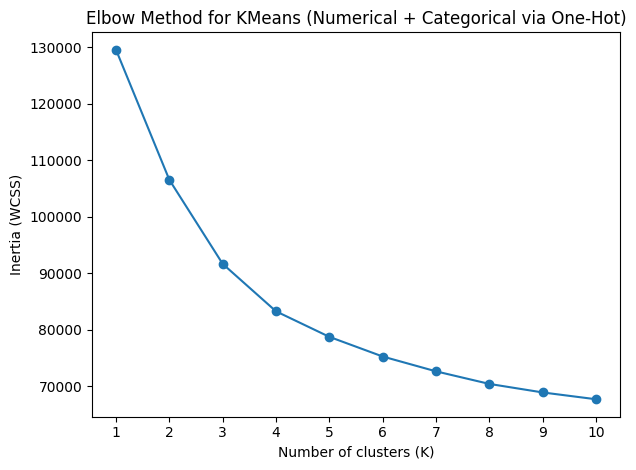

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# =========================
# ELBOW METHOD (KMeans) - unico blocco
# =========================

# 1) Feature only (NO target)
X_unsup = df_clean.drop(columns=["Churn Label"], errors="ignore").copy()
X_unsup = X_unsup.drop(columns=[c for c in X_unsup.columns if "Churn" in c], errors="ignore")  # safety

# 2) Numeriche / categoriche
num_cols = X_unsup.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_unsup.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# 3) Preprocessing (impute + scale numeriche, impute + one-hot categoriche)
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# 4) Trasforma una sola volta
X_mat = preprocess.fit_transform(X_unsup)

# 5) Elbow: calcolo inertia per K=1..10
K_range = range(1, 11)
inertia = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_mat)
    inertia.append(km.inertia_)

# 6) Grafico Elbow
plt.figure()
plt.plot(list(K_range), inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for KMeans (Numerical + Categorical via One-Hot)")
plt.xticks(list(K_range))
plt.tight_layout()
plt.show()

